# Homemade K-Means Clustering Algorithm in Python

In [26]:
import sys
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.spatial.distance import cdist, euclidean
from KMeans import KMeans
import sklearn
from sklearn.cluster import KMeans as SKKMeans

## Versions

In [27]:
print(f"Python version\n{sys.version}\n")
print("Pandas version:       ", pd.__version__)
print("NumPy version:        ", np.__version__)
print("MatPlotLib version:   ", matplotlib.__version__)
print("SciPy version:        ", scipy.__version__)
print("Sci-Kit Learn version:", sklearn.__version__)

Python version
3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]

Pandas version:        0.25.1
NumPy version:         1.17.2
MatPlotLib version:    3.1.1
SciPy version:         1.3.1
Sci-Kit Learn version: 0.22.2.post1


## Demonstration

### Randomizing Data

In [2]:
random.seed(84)
data = np.array([
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
])

data

array([[ 4,  0],
       [ 7,  0],
       [ 8, 10],
       [ 5,  3],
       [ 7,  7],
       [ 8,  5],
       [ 9,  2],
       [ 8,  4],
       [ 8,  7],
       [ 6,  5],
       [ 9,  3],
       [ 2, 10],
       [ 7,  0],
       [ 8,  0],
       [ 2,  0],
       [ 7,  8],
       [10,  4],
       [ 8,  1],
       [ 0,  3],
       [ 3,  6],
       [ 2,  4],
       [ 1,  4],
       [ 1,  1],
       [ 8,  1],
       [ 7,  8]])

In [3]:
x = []
y = []
for i, j in data:
    x.append(i)
    y.append(j)
    
x

[4, 7, 8, 5, 7, 8, 9, 8, 8, 6, 9, 2, 7, 8, 2, 7, 10, 8, 0, 3, 2, 1, 1, 8, 7]

In [4]:
y

[0, 0, 10, 3, 7, 5, 2, 4, 7, 5, 3, 10, 0, 0, 0, 8, 4, 1, 3, 6, 4, 4, 1, 1, 8]

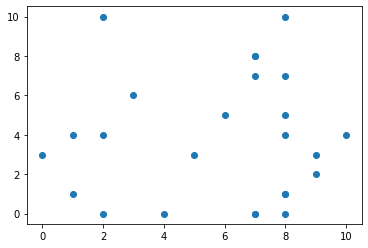

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
df = pd.DataFrame({"x" : x, "y" : y})

print(df.shape)
df

(25, 2)


,x,y
0,4,0
1,7,0
2,8,10
3,5,3
4,7,7
5,8,5
6,9,2
7,8,4
8,8,7
9,6,5


### Trying Homemade K-Means Clustering Algorithm on Data

In [42]:
kmeans = KMeans(n_clusters=2, n_iter=10, random_state=84)
kmeans_fit = kmeans.fit(data)

kmeans.clusters

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1])

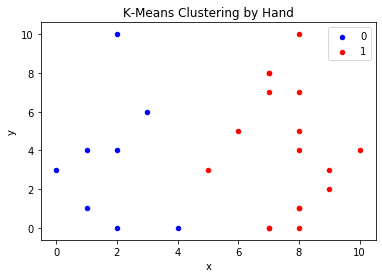

In [43]:
colors = {1 : 'red', 0 : 'blue'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering by Hand')

grouped = df.groupby(kmeans.clusters)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

### Comparison with Sci-Kit Learn K-Means Function

In [44]:
skkmeans = SKKMeans(n_clusters=2, random_state=84)
skkmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=84, tol=0.0001, verbose=0)

So far, given that the integer designating each cluster and resulting color are subjective, the results are for all practical purposes, *identical* 

In [45]:
skkmeans = skkmeans.fit(data)
print(skkmeans.labels_)

[1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0]


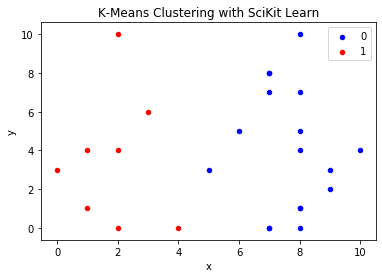

In [46]:
colors = {0 : 'blue', 1 : 'red'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering with SciKit Learn')

grouped = df.groupby(skkmeans.labels_)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

#### Key Differences:

__Note above__ in that the Sci-Kit Learn implementation of the algorithm that there is a *max_iter* and *tol* hyper-parameter. In a truly dynamic implementation of K-Means Clustering, these two work together to let the program know when to stop optimizing in its search for the center of each cluster. In this case, however, the homemade implementation is less dynamic, with an *n_iter* hyper-parameter taking the place of *max_iter* and *tol* not being used entirely. The effect of this is that, by tuning, *n_iter* the programmer can see each stage of the optimization process as demonstrated below.

In [48]:
one_iter = KMeans(n_clusters=2, n_iter=1, random_state=84)
two_iter = KMeans(n_clusters=2, n_iter=2, random_state=84)
three_iter = KMeans(n_clusters=2, n_iter=3, random_state=84)
four_iter = KMeans(n_clusters=2, n_iter=4, random_state=84)
five_iter = KMeans(n_clusters=2, n_iter=5, random_state=84)

one_iter_fit = one_iter.fit(data)
two_iter_fit = two_iter.fit(data)
three_iter_fit = three_iter.fit(data)
four_iter_fit = four_iter.fit(data)
# five_iter_fit


print(one_iter.clusters)
print(two_iter.clusters)
print(three_iter.clusters)
print(four_iter.clusters)
# print(five_iter.clusters)

[0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1]
[0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1]
[0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


__Note__ that the first three NumPy arrays containing the clusters change with each successive itteration; whereas, the fourth is identical to the third. Given that all successive itterations --including those beyond four--- would be equal to the third, this indicates that the algorith has converged.

Let's visualize this below.

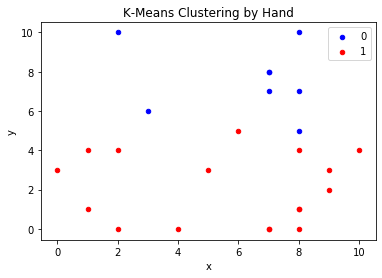

In [37]:
colors = {1 : 'red', 0 : 'blue'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering by Hand')

grouped = df.groupby(one_iter.clusters)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

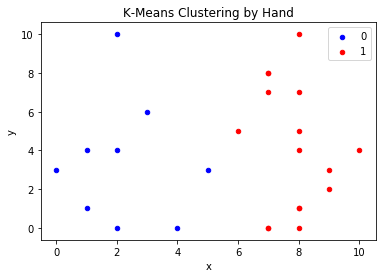

In [38]:
colors = {1 : 'red', 0 : 'blue'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering by Hand')

grouped = df.groupby(two_iter.clusters)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

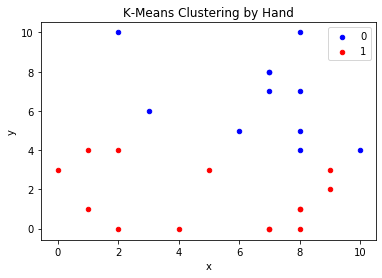

In [39]:
colors = {1 : 'red', 0 : 'blue'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering by Hand')

grouped = df.groupby(three_iter.clusters)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

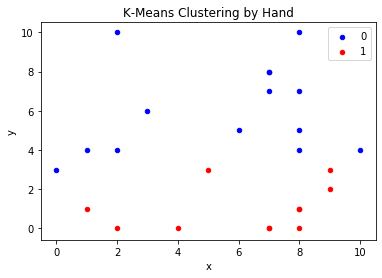

In [40]:
colors = {1 : 'red', 0 : 'blue'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering by Hand')

grouped = df.groupby(four_iter.clusters)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()